<a href="https://colab.research.google.com/github/maltaro/DS-Unit-2-Kaggle-Challenge/blob/master/module1/kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [47]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
# Pandas Profiling can be very slow with medium & large datasets.
# These parameters will make it faster.
# https://github.com/pandas-profiling/pandas-profiling/issues/222

import pandas_profiling as pp




In [9]:
pp.ProfileReport(train)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
# splitting train into train and validate
train, val = train_test_split(train, stratify=train['status_group'])


In [17]:
train.head(1)

id  amount_tsh  ... waterpoint_type_group status_group
35240  28252       200.0  ...    communal standpipe   functional

[1 rows x 41 columns]

In [52]:
train.shape

(44550, 41)

In [19]:
test.shape

(14358, 40)

In [0]:
import plotly.express as px


In [42]:
train.describe().T

count          mean  ...           75%            max
id                 44550.0  37014.537755  ...  55374.250000   74247.000000
amount_tsh         44550.0    324.898325  ...     25.000000  350000.000000
gps_height         44550.0    669.616094  ...   1320.000000    2770.000000
longitude          43195.0     35.149387  ...     37.224180      40.344301
latitude           43195.0     -5.894747  ...     -3.378256      -0.998464
num_private        44550.0      0.485140  ...      0.000000    1776.000000
region_code        44550.0     15.252391  ...     17.000000      99.000000
district_code      44550.0      5.607250  ...      5.000000      80.000000
population         44550.0    179.684085  ...    215.000000   15300.000000
construction_year  44550.0   1302.070011  ...   2004.000000    2013.000000

[10 rows x 8 columns]

In [0]:
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # The following columns contain null values instead of NaNs. with 
    # this code they will be replaced by NaNs 
    cols_with_zeros = ['longitude', 'latitude',  
                       "construction_year","gps_height"]
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # quantity & quantity_group are duplicates, also num_private has no 
    # useful information, so these columns will be dropped 
    X = X.drop(columns=['quantity_group',"num_private"])
    
    # return the wrangled dataframe
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [23]:
px.scatter(train, x='longitude', y='latitude', color='status_group', opacity=0.1)

In [54]:
#  time to calculate the baselines

base_train = train["status_group"].value_counts()[0] / len(train["status_group"])
print(base_train)

# the baseline for the training data 54 %. When we guess functional we will 
# be correct 54 % of the time

0.5430751964085297


In [55]:
# It would be better to combine train and val for the baseline. As with train
# "functional" is the majority class for val. 

val["status_group"].value_counts()


functional                 8065
non functional             5706
functional needs repair    1079
Name: status_group, dtype: int64

In [56]:

base_val = val["status_group"].value_counts()[0] / len(val["status_group"])
print(base_val)

# as there is barely any difference we will stick to base_train and not 
# combine the two values. 

0.5430976430976431


In [32]:
fig = px.scatter_mapbox(train, lat='latitude', lon='longitude', color='status_group', opacity=0.1)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

In [59]:
train.describe().T

count          mean  ...          75%            max
id                 44550.0  37004.116745  ...  55551.75000   74246.000000
amount_tsh         13241.0   1070.132362  ...    750.00000  350000.000000
gps_height         44550.0    668.490887  ...   1320.00000    2770.000000
longitude          43172.0     35.155872  ...     37.23575      40.345193
latitude           43172.0     -5.877657  ...     -3.37238      -0.998464
region_code        44550.0     15.275892  ...     17.00000      99.000000
district_code      44550.0      5.652705  ...      5.00000      80.000000
population         28588.0    282.454736  ...    320.00000   30500.000000
construction_year  29062.0   1996.781639  ...   2008.00000    2013.000000

[9 rows x 8 columns]

In [70]:
px.scatter(train, x ="gps_height", y = "status_group")

In [0]:
# I have wrangled the numerical columns. Now it is time to have a look at the 
# categorical ones


In [101]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(categorical_features)

['basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [74]:
train.isnull().sum()

# amount_tsh has a very high percentage of 
# NaNs. I will not include it in my model. 

id                           0
amount_tsh               31278
date_recorded                0
funder                    2720
gps_height               15338
installer                 2729
longitude                 1380
latitude                  1380
wpt_name                     0
basin                        0
subvillage                 285
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population               16017
public_meeting            2524
recorded_by                  0
scheme_management         2913
scheme_name              21193
permit                    2285
construction_year        15544
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [0]:
features = ["amount_tsh",
 'gps_height',
 'longitude',
 'latitude',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'basin',
 'region',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [0]:
# now it is time to set up the pipeline. As I am testing different 
# combinations I will run all the relevant code in one cell.

In [135]:
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train, val = train_test_split(train, stratify=train['status_group'])

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # The following columns contain null values instead of NaNs. with 
    # this code they will be replaced by NaNs 
    cols_with_zeros = ['longitude', 'latitude',  
                       "construction_year","gps_height"]
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # quantity & quantity_group are duplicates, also num_private has no 
    # useful information, so these columns will be dropped 
    X = X.drop(columns=['quantity_group',"num_private"])
    
    # return the wrangled dataframe
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

target = 'status_group'

spare = ['gps_height',
 'longitude',
 'latitude',
 'recorded_by']

features = ['gps_height',
 'longitude',
 'latitude',
 "amount_tsh",
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators = 300, max_depth=25, random_state=0)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on train, val
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)

Train Accuracy 0.9678563411896746
Validation Accuracy 0.8065993265993266


In [171]:
test_pred = pd.DataFrame(y_pred, columns=["status_group"])
test_pred.head()

status_group
0  non functional
1      functional
2      functional
3  non functional
4      functional

In [0]:
test_id = test["id"]

In [0]:
submission = pd.concat([test_id,test_pred],axis=1)

In [0]:
sample_submission['status_group'] = y_pred

In [184]:
sample_submission.head()

id    status_group
0  50785  non functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional

In [179]:
submission.shape

(14358, 2)

In [180]:
sample_submission.shape

(14358, 2)

In [0]:
from google.colab import files
sample_submission.to_csv('Srimal3.csv', index=False) 


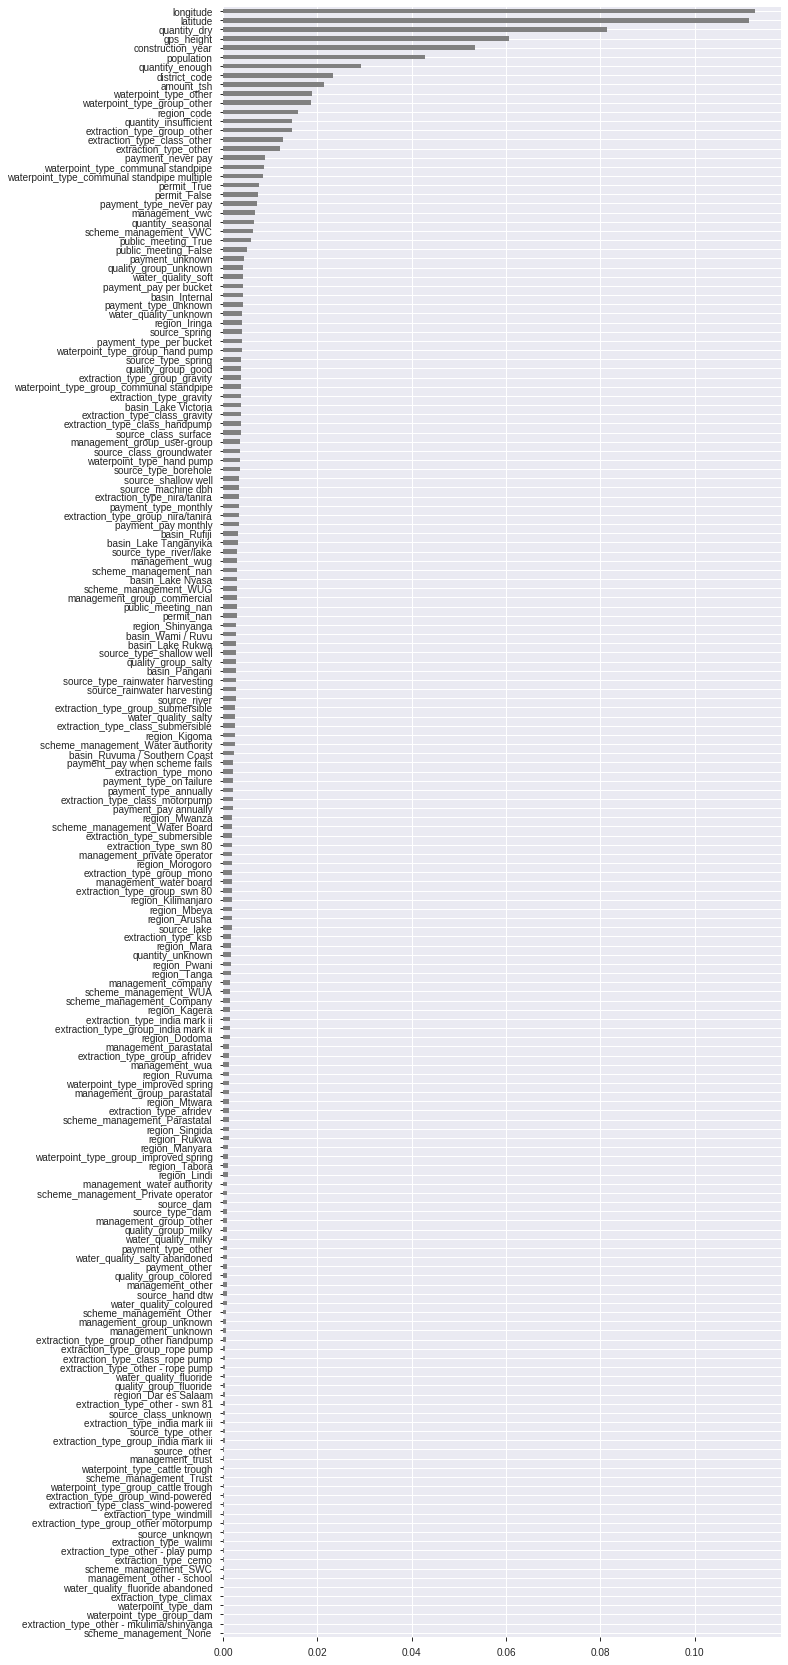

In [136]:
model = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh(color='grey')

In [128]:
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train, val = train_test_split(train, stratify=train['status_group'])

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # The following columns contain null values instead of NaNs. with 
    # this code they will be replaced by NaNs 
    cols_with_zeros = ['longitude', 'latitude',  
                       "construction_year","gps_height"]
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # quantity & quantity_group are duplicates, also num_private has no 
    # useful information, so these columns will be dropped 
    X = X.drop(columns=['quantity_group',"num_private"])
    
    # return the wrangled dataframe
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

target = 'status_group'

spare = ['gps_height',
 'longitude',
 'latitude',
 'recorded_by']

features = ['gps_height',
 'longitude',
 'latitude',
 'recorded_by',
 "amount_tsh",
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier


pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(max_depth=30, random_state=42)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on train, val
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)

Train Accuracy 0.9872278338945005
Validation Accuracy 0.7558249158249158
